
# Introduction

    This report presents the various methods applied for the resolution of two problems of classification in a first part then for a problem of regression in a second. For our two three problems, a partitioning of the data into a set of training data and a set of test data is carried out and a creation of cross-validation functions as this allows the objective comparison of the models built. We have chosen to create our classification and regression models with non-standardized data. The format of the expected . Moreover, standardizing the data of the training file and the test file independently showed a tendency to accentuate the misclassification rate or the MSE.

# Classification problem 

    The problem treated in this first part is a classification problem. The variable to be explained, y, is nominal qualitative with 5 modalities {aa,ao,dcl,iy,sh}. To predict this variable, we have 256 quantitative explanatory variables whose values seem to be centered and reduced. We have 2250 complete statements.
    
    We will note n, the number of readings and p, the number of explanatory variables. Here we therefore have large n (n=2250) and large p (p=256).


In [1]:
import pandas as pd
from pandas import DataFrame as df

# Python ≥3.5 is required
import sys

# Scikit-Learn ≥0.20 is required
import sklearn

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


#Preprocessing basique
Ici, on divise le jeu de données en différentes parties pour la valdiation croisée.

# Take a Quick Look at the Data Structure

In [3]:
filename = 'data/parole_train.txt'

# import numpy as np
# data = np.loadtxt(filename, delimiter=',', skiprows=1, dtype=str)
# print(data)

data = pd.read_csv(filename, sep=" ")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X248,X249,X250,X251,X252,X253,X254,X255,X256,y
2917,-1.175735,-1.650645,-1.518300,-1.696710,-1.861101,-1.915848,-1.562310,-2.111612,-1.532035,-0.629194,...,-1.054724,-2.130023,-1.134176,-1.769565,-1.943537,-2.303772,-1.574041,-1.696654,-2.254121,dcl
3585,0.619878,1.482367,0.048485,1.241911,-0.236970,1.282777,-0.683276,0.872537,1.110080,-0.650759,...,-0.386911,0.289831,-0.315394,0.892251,0.528590,1.140884,0.691302,0.837480,0.733473,ao
1362,0.222589,-0.571834,0.156863,0.061080,1.083113,-0.273993,-0.102853,-0.593776,0.258496,-0.150921,...,0.188335,0.999129,0.329852,0.655471,0.068178,-0.321057,-0.757614,-0.623948,1.120193,iy
417,-0.588873,0.122128,-1.189937,0.152294,-0.151608,-0.079173,-0.952635,-0.813170,0.468880,-0.243402,...,-0.101033,1.345664,-0.409508,0.268673,0.136143,0.263129,0.697071,0.595379,0.712218,iy
1381,0.169617,-0.439559,-0.546041,-0.645742,1.211735,-0.401588,0.296695,-0.843744,1.331541,0.135480,...,0.203967,0.729383,-0.843438,1.115614,0.502869,-0.850832,0.692746,0.080672,-0.003578,iy


In [4]:
data.shape

(2250, 257)

In [5]:
# reassign index of data 

data.sort_index(axis = 0)
data.index = range(0, data.shape[0])

data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X248,X249,X250,X251,X252,X253,X254,X255,X256,y
0,-1.175735,-1.650645,-1.518300,-1.696710,-1.861101,-1.915848,-1.562310,-2.111612,-1.532035,-0.629194,...,-1.054724,-2.130023,-1.134176,-1.769565,-1.943537,-2.303772,-1.574041,-1.696654,-2.254121,dcl
1,0.619878,1.482367,0.048485,1.241911,-0.236970,1.282777,-0.683276,0.872537,1.110080,-0.650759,...,-0.386911,0.289831,-0.315394,0.892251,0.528590,1.140884,0.691302,0.837480,0.733473,ao
2,0.222589,-0.571834,0.156863,0.061080,1.083113,-0.273993,-0.102853,-0.593776,0.258496,-0.150921,...,0.188335,0.999129,0.329852,0.655471,0.068178,-0.321057,-0.757614,-0.623948,1.120193,iy
3,-0.588873,0.122128,-1.189937,0.152294,-0.151608,-0.079173,-0.952635,-0.813170,0.468880,-0.243402,...,-0.101033,1.345664,-0.409508,0.268673,0.136143,0.263129,0.697071,0.595379,0.712218,iy
4,0.169617,-0.439559,-0.546041,-0.645742,1.211735,-0.401588,0.296695,-0.843744,1.331541,0.135480,...,0.203967,0.729383,-0.843438,1.115614,0.502869,-0.850832,0.692746,0.080672,-0.003578,iy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,-0.503580,-1.114283,-1.797796,-0.745725,0.953038,-0.152635,-1.352458,-1.201237,1.235093,-0.231705,...,-0.778305,0.485137,-1.053465,1.185167,-1.225715,-0.630292,0.594493,0.477841,1.091948,iy
2246,-0.705569,-1.497737,-1.527302,-1.810176,-1.254971,-1.887304,-1.256131,-2.050361,-2.049298,-1.255114,...,-1.462229,-2.121737,-1.247307,-1.358038,-2.121302,-3.175024,-1.604009,-1.175687,-1.827247,dcl
2247,1.440042,0.081470,1.163438,0.083069,-0.650143,0.113956,1.855988,0.309624,0.766927,-0.178972,...,1.983458,-0.104942,2.224396,1.176499,0.652176,-0.130681,1.073464,1.425257,-0.024198,sh
2248,-1.007842,-1.715236,-1.022884,-1.241708,-1.118822,-1.397690,-0.927600,-1.862858,-2.229797,-0.821927,...,-1.584820,-2.045264,-1.552007,-1.678828,-0.583200,-0.566004,-1.167270,-1.626018,-1.611162,dcl


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Columns: 257 entries, X1 to y
dtypes: float64(256), object(1)
memory usage: 4.4+ MB


In [7]:
data['y'].value_counts()

iy     586
ao     508
sh     429
dcl    394
aa     333
Name: y, dtype: int64

In [8]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256
count,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,...,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000
mean,-0.013219,-0.015497,-0.009999,-0.018886,-0.011629,-0.023628,-0.022185,-0.010542,-0.003608,0.000531,...,-0.012268,-0.006543,-0.012566,-0.016625,-0.020497,-0.018933,-0.026451,-0.011895,-0.023695,-0.014592
std,0.998291,1.002554,0.992860,1.006557,1.009904,1.005727,0.989308,1.007504,0.997434,0.995302,...,0.999760,0.999829,1.006692,0.989872,1.002161,1.011192,1.003608,0.997008,0.982287,0.999071
min,-2.991474,-3.300566,-2.765310,-3.115712,-2.975049,-3.318397,-2.835168,-3.082623,-2.952046,-3.369833,...,-3.203696,-3.130133,-3.154387,-3.478817,-3.203618,-3.392265,-4.043980,-3.948647,-3.307178,-3.243681
25%,-0.790133,-0.728758,-0.774848,-0.607563,-0.846604,-0.640620,-0.784537,-0.666217,-0.720765,-0.761317,...,-0.583194,-0.780409,-0.621999,-0.774659,-0.737677,-0.586536,-0.601051,-0.742025,-0.802632,-0.686833
50%,-0.113707,-0.077784,-0.146538,0.054306,0.062093,-0.043927,-0.123772,-0.068956,0.097385,0.013621,...,0.194333,-0.108668,0.151267,-0.134679,0.101207,0.102760,0.086034,-0.013848,-0.070795,0.115256
75%,0.667928,0.832256,0.702931,0.633447,0.823974,0.612098,0.676189,0.861246,0.765405,0.832479,...,0.716716,0.672219,0.748418,0.687973,0.770633,0.653305,0.655297,0.748212,0.678693,0.757501
max,2.790291,2.408981,2.860253,3.135343,2.408883,2.660080,3.051340,2.111059,2.354763,2.264558,...,2.206698,2.656900,2.223092,2.800699,2.067773,3.395259,3.002900,2.623518,2.612141,2.159839


array([[<AxesSubplot:title={'center':'X1'}>,
        <AxesSubplot:title={'center':'X2'}>,
        <AxesSubplot:title={'center':'X3'}>],
       [<AxesSubplot:title={'center':'X4'}>,
        <AxesSubplot:title={'center':'X5'}>,
        <AxesSubplot:title={'center':'X6'}>],
       [<AxesSubplot:title={'center':'X7'}>,
        <AxesSubplot:title={'center':'X8'}>,
        <AxesSubplot:title={'center':'X9'}>],
       [<AxesSubplot:title={'center':'X10'}>,
        <AxesSubplot:title={'center':'X11'}>,
        <AxesSubplot:title={'center':'X12'}>]], dtype=object)

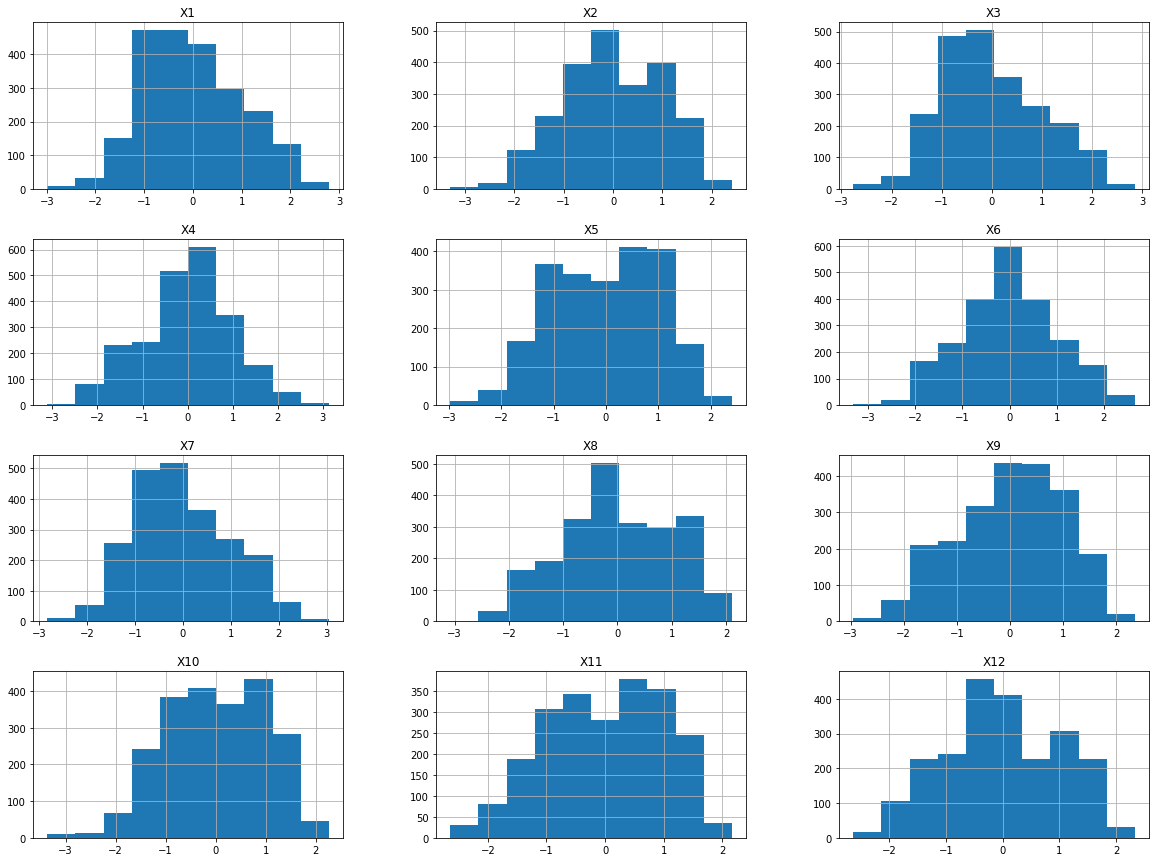

In [9]:
# Plot a histogram for each numerical attribute 

%matplotlib inline

data[data.columns[0:12]].hist(figsize = (20,15))

these attributes have same scale and they are distributed around 0 in interval [-3,3] 

In [10]:
from sklearn.model_selection import train_test_split

# X = data

In [11]:
def separate_features_target(data):
    X_cols = []
    for col in data.columns: 
        if(col != 'y'):
            X_cols.append(col)
    
    return data[X_cols] , data['y']        


X_data, y_data = separate_features_target(data)

In [12]:
y_data

0       dcl
1        ao
2        iy
3        iy
4        iy
       ... 
2245     iy
2246    dcl
2247     sh
2248    dcl
2249     iy
Name: y, Length: 2250, dtype: object

## PCA Analyse

First, we performed a principal component analysis to reduce the number of explanatory variables in order to visualize the data given their high dimensionality. Then, we created the sets that we will use later for cross-validation.

PCA is effected by scale but not nessary because data atributes have same scale

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [14]:
principalDf

,principal component 1,principal component 2
0,-24.938485,10.594191
1,5.481803,-6.239419
2,4.388394,-1.969569
3,-1.406654,-3.187075
4,3.651482,-0.219442
...,...,...
2245,-2.129669,-2.158515
2246,-23.983351,10.104300
2247,16.791997,6.872594
2248,-22.992368,7.657830


In [15]:
finalDf = pd.concat([principalDf, y_data], axis = 1) 

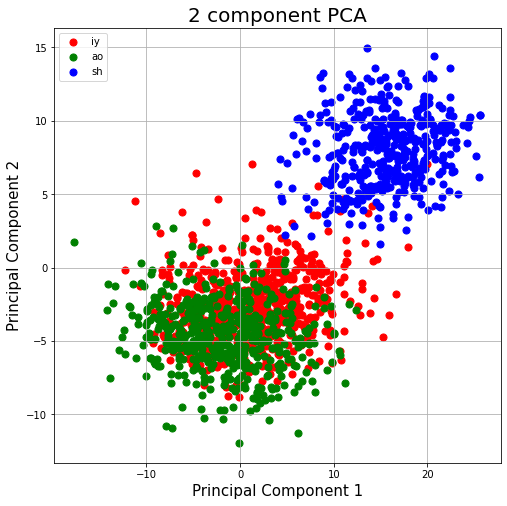

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['iy','ao','sh','dcl','aa']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [17]:
pca.explained_variance_ratio_

array([0.55167528, 0.15207649])

This chart plots the percentage of variance explained against the number of principal components. We notice that PC1 explains 55% of the total variance and PC2 15%. Therefore, with these two components we can represent 70% of the information contained by the 256 variables. And as a result, obtain a rather faithful representation of individuals in 2 dimensions. The projection on the factorial axes reveals three clusters, two of which can easily be assimilated to distinct classes of phonemes.

## Prepare the Data for Machine Learning Algorithms

### Create a train/test Set 

In [18]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size    = int(len(data) * test_ratio)
    test_indices     = shuffled_indices[:test_set_size]
    train_indices    = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [19]:
train_set, test_set = split_train_test(data , 0.1)\

print("size of train data : ", len(train_set))
print("size of test data  : ", len(test_set ))

size of train data :  2025
size of test data  :  225


In [20]:
X_train, y_train = separate_features_target(train_set)

X_test,  y_test  = separate_features_target(test_set)

### Training and Evaluating on the Training Set

In [21]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from statistics import mean

## Choosing model 

### Model Comparison Methodology:

To begin with, we created a 10-CV cross-validation function to compare the results of different classification models. The purpose of this is to evaluate the accuracy of our model on several test subsets and then to average them and thus obtain more reliable results. We have adapted it to the different models tested.

In [145]:
def display_scores(scores, model, kernel):
     print("Mean accuracy of ",model, " ",kernel, ":",  round(scores.mean(),3), "Standard deviation : ", round(scores.std(),3) )

In [165]:
def cross_validation(X_train=X_train, y_train=y_train, model="", kernel="", folds=1):
    
    cv = RepeatedStratifiedKFold(n_splits=folds, n_repeats=3, random_state=1)

    if (model == "LDA"):
        scores = LDA_cross_validiation_accuracy(X_train, y_train,cv)
    elif (model == "QDA"):
        scores = QDA_cross_validiation_accuracy(X_train, y_train,cv)
    elif (model == "NB"):
        scores = NB_cross_validiation_accuracy(X_train, y_train,cv)
    elif (model == "KNN"):
        scores = KNN_cross_validiation_accuracy(X_train, y_train,cv)
    elif (model == "SVM"):
        scores = SVM_cross_validiation_accuracy(X_train, y_train,cv, kernel)
    elif (model == "RF"):
        scores = RF_cross_validiation_accuracy(X_train, y_train,cv)         

    display_scores(scores, model, kernel)

### Discriminant analysis methods

We first looked at discriminating models. Here we find ourselves with a high p and n.

Discriminant analysis encompasses methods that can be used for both classification and dimensionality reduction. Linear discriminant analysis (LDA) is particularly popular because it is both a classifier and a dimensionality reduction technique. Quadratic discriminant analysis (QDA) is a variant of LDA that allows nonlinear separation of data. The QDA may not be efficient in our case because of its large number of parameters. The results presented are the MSEs obtained for the different models.

In [150]:
import sklearn.discriminant_analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


### LDA ###

def LDA_cross_validiation_accuracy(X_train, y_train, cv):
    model = LinearDiscriminantAnalysis()
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

### QDA ###

def QDA_cross_validiation_accuracy(X_train, y_train, cv):
    model = QuadraticDiscriminantAnalysis()
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [151]:
X, y = separate_features_target(data) 

cross_validation(X_train, y_train, "LDA","",10)
cross_validation(X_train, y_train, "QDA","", 10)

Mean accuracy of  LDA    : 0.92 Standard deviation :  0.016
Mean accuracy of  QDA    : 0.618 Standard deviation :  0.013


We notice that the LDA makes it possible to obtain a good performance.

### Naive Bayes 

In [152]:
from sklearn.naive_bayes import GaussianNB

def NB_cross_validiation_accuracy(X_train, y_train, cv):
    model = GaussianNB()
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [153]:
cross_validation(X_train, y_train, "NB","" , 10)

Mean accuracy of  NB    : 0.881 Standard deviation :  0.021


Find best k by testing different possible values of k, then choosing the optimal k that minimizes the cross-validation ("cv") error and fits the final best KNN model that best explains our data

### K-Nearest Neighbors 

Minimum error:- 0.06222222222222222 at K = 7


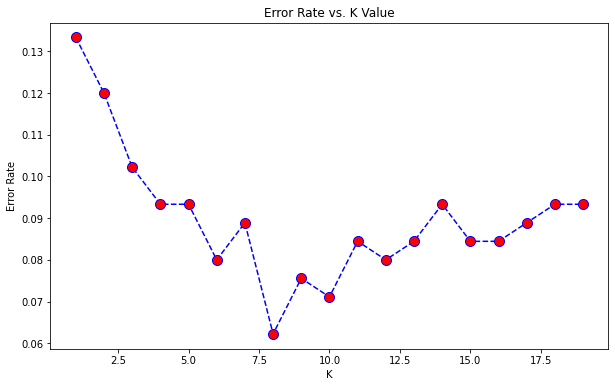

In [154]:
from sklearn.neighbors import KNeighborsClassifier


error_rate = []
for i in range(1,20):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train,y_train)
     pred_i = knn.predict(X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9377777777777778 at K = 7


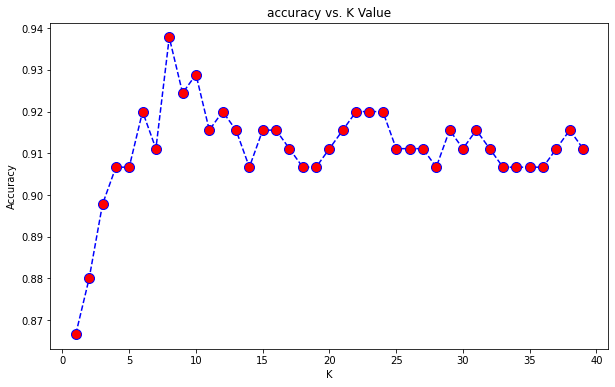

In [155]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [156]:

def KNN_cross_validiation_accuracy(X_train, y_train, cv):
    model = KNeighborsClassifier(n_neighbors=7)
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores


In [157]:
cross_validation(X_train, y_train,"KNN","", 10)

Mean accuracy of  KNN    : 0.904 Standard deviation :  0.016


### SVM (Support vector machine)

We are now interested in linear and radial SVMs. SVMs methods can be applied in the case of multi-class classification, they then decompose the problem into several binary classification problems. The method applied here is the one-on-one method. The difference between the two methods presented below is that one finds its linear boundaries in the prediction space while the other, more flexible, allows to widen the prediction space in order to find a better linear boundary in a new space.

In [159]:
from sklearn.svm import SVC

def SVM_cross_validiation_accuracy(X_train, y_train, cv, kernel):
    model = SVC(kernel=kernel)
    # evaluate model
    
    if (kernel == "poly"):
            model = SVC(kernel=kernel, degree=3)
    
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    
    return scores


In [160]:
cross_validation(X_train, y_train, "SVM", "linear", 10)
cross_validation(X_train, y_train, "SVM", "rbf"   , 10)
cross_validation(X_train, y_train, "SVM", "poly"  ,10)

Mean accuracy of  SVM   linear : 0.899 Standard deviation :  0.017
Mean accuracy of  SVM   rbf : 0.93 Standard deviation :  0.015
Mean accuracy of  SVM   poly : 0.898 Standard deviation :  0.015


We obtain a better result with the radial SVM. We then looked at other methods known for their performance on high-dimensional datasets.

### Random forests

The random forest method is based on the bagging system and is composed of several decision trees, working independently on a vision of a problem. Each produces an estimate, and it is the assembly of the decision trees and their analyzes that will give an overall estimate. The most frequent response category is chosen. Rather than using all the results obtained, a selection is made by looking for the forecast that comes up most often. This allows for better results than with a single decision tree.

In [172]:
from sklearn.ensemble import RandomForestClassifier

def RF_cross_validiation_accuracy(X_train, y_train, cv):
    model = RandomForestClassifier(n_estimators = 500,max_leaf_nodes=16, n_jobs=-1)
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    
    return scores



In [173]:
cross_validation(X_train, y_train, "RF","", 10)

Mean accuracy of  RF    : 0.92 Standard deviation :  0.016


## Best results 

We obtain the best precision with the radial SVM model. This can be explained by the fact that these two methods work very well in the case of high-dimensional spaces, which is the case here.